<a href="https://colab.research.google.com/github/LaetitiaVerel/Odyssey-Quests/blob/master/Pandas%20Part%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mission 1

Display the first 10 rows of the following file: http://bit.ly/imdbratings

In [ ]:
import pandas as pd

Data1 = pd.read_csv("https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/imdb_1000.csv", sep = ",")

In [ ]:
Data1.head(10)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


# Mission 2

Sort your dataframe in ascending order according to the star_rating column.

In [ ]:
Data1.sort_values(by = 'star_rating', inplace = True)
Data1.head(10)

,star_rating,title,content_rating,genre,duration,actors_list
978,7.4,Wall Street,R,Crime,126,"[u'Charlie Sheen', u'Michael Douglas', u'Tamar..."
950,7.4,Bound,R,Crime,108,"[u'Jennifer Tilly', u'Gina Gershon', u'Joe Pan..."
949,7.4,Home Alone,PG,Comedy,103,"[u'Macaulay Culkin', u'Joe Pesci', u'Daniel St..."
948,7.4,Frances Ha,R,Comedy,86,"[u'Greta Gerwig', u'Mickey Sumner', u'Adam Dri..."
947,7.4,Eraserhead,UNRATED,Drama,89,"[u'Jack Nance', u'Charlotte Stewart', u'Allen ..."
946,7.4,Far from Heaven,PG-13,Drama,107,"[u'Julianne Moore', u'Dennis Quaid', u'Dennis ..."
945,7.4,Take Shelter,R,Drama,120,"[u'Michael Shannon', u'Jessica Chastain', u'Sh..."
944,7.4,Terms of Endearment,R,Comedy,132,"[u'Shirley MacLaine', u'Debra Winger', u'Jack ..."
943,7.4,The Bucket List,PG-13,Adventure,97,"[u'Jack Nicholson', u'Morgan Freeman', u'Sean ..."
942,7.4,Raising Arizona,PG-13,Comedy,94,"[u'Nicolas Cage', u'Holly Hunter', u'Trey Wils..."


# Mission 3

Answer the question below:
- What is the median star rating?
- What gender is the most highly rated?
- What is the percentage for each film genre?

In [ ]:
# What is the median star rating?

print(Data1['star_rating'].median())

7.8


In [ ]:
# What gender is the most highly rated?

Data1_genre = Data1[['star_rating', 'genre']].groupby(['genre']).mean()
Data1_genre.sort_values(by = 'star_rating', ascending = False, inplace = True)
Data1_genre

,star_rating
genre,
Western,8.255556
Film-Noir,8.033333
History,8.000000
Mystery,7.975000
Adventure,7.933333
Sci-Fi,7.920000
Crime,7.916935
Animation,7.914516
Drama,7.902518


In [ ]:
# What is the percentage for each film genre?

Genre_percentage = Data1['genre'].value_counts() / 979 * 100
Genre_percentage

Drama        28.396323
Comedy       15.934627
Action       13.891726
Crime        12.665986
Biography     7.865169
Adventure     7.660878
Animation     6.332993
Horror        2.962206
Mystery       1.634321
Western       0.919305
Thriller      0.510725
Sci-Fi        0.510725
Film-Noir     0.306435
Family        0.204290
History       0.102145
Fantasy       0.102145
Name: genre, dtype: float64

# Mission 4

Make a visualization using matplotlib that reflects the film genres. Make it a pie chart, it should have a legend and show the percentages of each genre.

In [ ]:
import matplotlib.pyplot as plt

Pourcentage = dict(Genre_percentage)
print(Pourcentage)
Valeurs = list(Pourcentage.values())
Label = list(Pourcentage.keys())
print(Label)
print(Valeurs)

{'Drama': 28.39632277834525, 'Comedy': 15.934627170582228, 'Action': 13.891726251276811, 'Crime': 12.665985699693566, 'Biography': 7.865168539325842, 'Adventure': 7.6608784473953015, 'Animation': 6.332992849846783, 'Horror': 2.96220633299285, 'Mystery': 1.634320735444331, 'Western': 0.9193054136874361, 'Thriller': 0.5107252298263534, 'Sci-Fi': 0.5107252298263534, 'Film-Noir': 0.30643513789581206, 'Family': 0.20429009193054137, 'History': 0.10214504596527069, 'Fantasy': 0.10214504596527069}
['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery', 'Western', 'Thriller', 'Sci-Fi', 'Film-Noir', 'Family', 'History', 'Fantasy']
[28.39632277834525, 15.934627170582228, 13.891726251276811, 12.665985699693566, 7.865168539325842, 7.6608784473953015, 6.332992849846783, 2.96220633299285, 1.634320735444331, 0.9193054136874361, 0.5107252298263534, 0.5107252298263534, 0.30643513789581206, 0.20429009193054137, 0.10214504596527069, 0.10214504596527069]


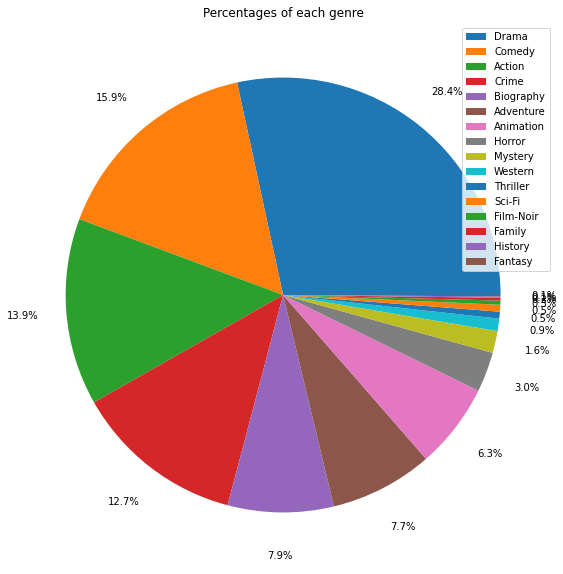

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

plt.pie(Valeurs,
        autopct='%1.1f%%',
        pctdistance=1.2)

plt.title("Percentages of each genre")
plt.legend(loc = "upper right", labels = Label)

# Mission 5

Display only the rows of films that belong to the lowest rated genre on average

In [ ]:
Data1_lowest_genre = Data1[['star_rating', 'genre']].groupby(['genre']).mean()
Data1_lowest_genre.sort_values(by = 'star_rating', ascending = True, inplace = True)
Data1_lowest_genre

,star_rating
genre,
Thriller,7.680000
Fantasy,7.700000
Horror,7.806897
Comedy,7.822436
Family,7.850000
Biography,7.862338
Action,7.884559
Drama,7.902518
Animation,7.914516


In [ ]:
Data1[Data1['genre'] == 'Thriller']

,star_rating,title,content_rating,genre,duration,actors_list
848,7.5,The Man Who Knew Too Much,PG,Thriller,120,"[u'James Stewart', u'Doris Day', u'Brenda de B..."
902,7.5,Frenzy,R,Thriller,116,"[u'Jon Finch', u'Barry Foster', u'Alec McCowen']"
728,7.6,La piel que habito,R,Thriller,120,"[u'Antonio Banderas', u'Elena Anaya', u'Jan Co..."
496,7.8,Misery,R,Thriller,107,"[u'James Caan', u'Kathy Bates', u'Richard Farn..."
350,8.0,Shadow of a Doubt,APPROVED,Thriller,108,"[u'Teresa Wright', u'Joseph Cotten', u'Macdona..."


# Mission 6

Display films that are longer than 200 minutes and that belong to a genre that's name contains the letter h (either lower case or upper case)


In [ ]:
Data1_mission6 = Data1[(Data1['duration'] > 200) & (Data1.genre.str.lower().str.contains("h"))]
Data1_mission6

,star_rating,title,content_rating,genre,duration,actors_list
630,7.7,Malcolm X,PG-13,Biography,202,"[u'Denzel Washington', u'Angela Bassett', u'De..."
